In [1]:
import pandas as pd
import plotly.graph_objects as go
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import matplotlib.pyplot as plt

In [2]:
airline_data =  pd.read_csv('~/py/data/airline_data.csv', 
                                                      encoding = "ISO-8859-1",dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

In [23]:
# Create a dash application
app = dash.Dash(__name__)

# Get the layout of the application and adjust it.
# Create an outer division using html.Div and add title to the dashboard using html.H1 component
# Add a html.Div and core input text component
# Finally, add graph component.
app.layout = html.Div(children=
                    [
                        html.H1("Airline Performance Dashboard",style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),  
                        html.Div([dcc.Input(id="inpyear",value=2010,type='number',style={'height':'50px','font-size':35}),],
                                 style={'font-size': 40}),
                        html.Br(),
                        html.Br(),
                        html.Div([dcc.Graph(id="dergraph")]),
                        html.Div(id='my-output'),
                    ]
                     )


In [24]:
# add callback decorator
@app.callback(Output(component_id='inpyear',component_property='figure'),
              Output(component_id='my-output', component_property='children'),
               Input(component_id='dergraph',component_property='value'))

# Add computation to callback function and return graph
def get_graph(entered_year):
    # Select data based on the entered year
    df =  airline_data[airline_data['Year']==int(entered_year)]
    
    # Group the data by Month and compute average over arrival delay time.
    line_data = df.groupby('Month')['ArrDelay'].mean().reset_index()
    fig = go.Figure(data=go.Line(x=line_data['Month'], y=line_data['ArrDelay'], marker=dict(color='red')))
    '''
    go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines', marker=dict(color='green'))
    #
    fig = go.Figure(data=line_data)
    fig.update_layout(title="Month vs Average Flight Delay Time",xaxis_title="Month",yaxis_title="Arrival Delay")
    '''
    #fig = plt.plot(line_data['Month'],line_data['ArrDelay'])
    return fig,'Output: {}'.format(entered_year)

In [5]:
df =  airline_data[airline_data['Year']==int(2010)]
line_data = df.groupby('Month')['ArrDelay'].mean().reset_index()

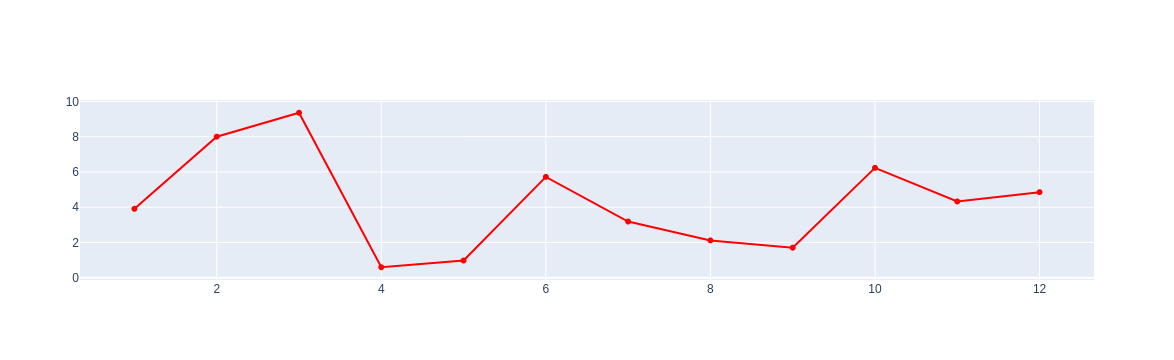

In [22]:
#go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines', marker=dict(color='green'))
#fig = go.Figure()
fig = go.Figure(data=go.Line(x=line_data['Month'], y=line_data['ArrDelay'], marker=dict(color='red')))
fig.show()

In [25]:
# Run the application                   
if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Jan/2022 22:34:17] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Jan/2022 22:34:17] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [13/Jan/2022 22:34:17] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [13/Jan/2022 22:34:17] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [13/Jan/2022 22:34:17] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/home/explorer/.conda/envs/pydaas/lib/python3.9/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/explorer/.conda/envs/pydaas/lib/python3.9/site-packages/flask/app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/explorer/.conda/envs/pydaas/lib/python3.9/site-packages/flask/app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/explorer/.conda/envs/pydaas/lib/python3.9/site-packages/flask/app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/home/explorer/.conda/envs/pydaas/lib/python3.9/site-packages/dash/dash.py", line 1336, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "/home/explorer/.conda/envs/pydaas/lib/python3.9/site-packages/dash/_callback.py"

127.0.0.1 - - [13/Jan/2022 22:34:18] "POST /_dash-update-component HTTP/1.1" 500 -
